# Schematics

This script generates figure S2: schematic of the regions, for which the cloud impact is determined.

### Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

### Generate colormap with two colors

In [2]:
# sample the colormaps that you want to use. Use 128 from each so we get 256
# colors in total
colors1 = np.array([166/255, 166/255, 166/255, 1])
colors2 = np.array([178/255, 34/255, 34/255, 1])

# combine two colors and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
del colors1, colors2

### Create latitude and longitude vectors

In [3]:
lats = np.arange(-90, 91, 1)
lons = np.arange(-180, 180, 1)

### Define regions for which the cloud impact is determined and generate masks

In [4]:
# tropics
lat_nort_TR = 30   # northern boundary: 30°N
lat_sout_TR = -30  # southern boundary: 30°S
lon_west_TR = -180 # western boundary: 180°W
lon_east_TR = 180  # eastern boundary: 180°E

# midlatitudes
lat_nort_ML_NH = 60   # northern boundary in NH: 60°N
lat_sout_ML_NH = 30   # southern boundary in NH: 30°N
lat_nort_ML_SH = -30  # northern boundary in SH: 30°S
lat_sout_ML_SH = -60  # southern boundary in SH: 60°S
lon_west_ML = -180 # western boundary: 180°W
lon_east_ML = 180  # eastern boundary: 180°E

# tropical Atlantic
lon_west_TA = -70  # western boundary: 70°W
lon_east_TA = 40   # eastern boundary: 40°E

# Indian Ocean
lon_west_IO = 40  # western boundary: 40°E
lon_east_IO = 120 # eastern boundary: 120°E

# western tropical Pacific
lon_west_WP = 120  # western boundary: 120°E
lon_east_WP = -150 # eastern boundary: 150°W

# eastern tropical Pacific
lon_west_EP = -150 # western boundary: 150°W
lon_east_EP = -70  # eastern boundary: 70°W

# extended North Atlantic
lat_nort_NAe = 60  # northern boundary: 60°N
lat_sout_NAe = 30  # southern boundary: 30°N
lon_west_NAe = -90 # western boundary:  270°E/90°W
lon_east_NAe = 30  # eastern boundary:  30°E


# create array with 1 over tropics and 0 everywhere else
# and array with 1 over midlatitudes and 0 everywhere else
mask_lat_TR = np.logical_and(lats >= lat_sout_TR, lats <= lat_nort_TR)
mask_lat_ML = np.logical_or(np.logical_and(lats >= lat_sout_ML_SH, lats <= lat_nort_ML_SH),
                            np.logical_and(lats >= lat_sout_ML_NH, lats <= lat_nort_ML_NH))
mask_lat_PO = np.logical_or(lats <= lat_sout_ML_SH, lats >= lat_nort_ML_NH)
mask_lon = np.logical_and(lons >= lon_west_TR, lons <= lon_east_TR)
mask_TR = np.logical_and(mask_lon[None,:], mask_lat_TR[:,None]) * 1
mask_ML = np.logical_and(mask_lon[None,:], mask_lat_ML[:,None]) * 1
mask_PO = np.logical_and(mask_lon[None,:], mask_lat_PO[:,None]) * 1
del mask_lat_ML, mask_lat_PO, mask_lon

# create array with 1 over tropical Atlantic and 0 everywhere else
mask_lon_TA = np.logical_and(lons >= lon_west_TA, lons <= lon_east_TA)
mask_TA = np.logical_and(mask_lon_TA[None,:], mask_lat_TR[:,None]) * 1
del mask_lon_TA

# create array with 1 over Indian Ocean and 0 everywhere else
mask_lon_IO = np.logical_and(lons >= lon_west_IO, lons <= lon_east_IO)
mask_IO = np.logical_and(mask_lon_IO[None,:], mask_lat_TR[:,None]) * 1
del mask_lon_IO

# create array with 1 over western tropical Pacific and 0 everywhere else
mask_lon_WP = (lons >= lon_west_WP) + (lons <= lon_east_WP) #np.logical_and(lons >= lon_west_WP, lons <= lon_east_WP)
mask_WP = np.logical_and(mask_lon_WP[None,:], mask_lat_TR[:,None]) * 1
del mask_lon_WP

# create array with 1 over eastern tropical Pacific and 0 everywhere else
mask_lon_EP = np.logical_and(lons >= lon_west_EP, lons <= lon_east_EP)
mask_EP = np.logical_and(mask_lon_EP[None,:], mask_lat_TR[:,None]) * 1
del mask_lon_EP

# create array with 1 over NAext and 0 everywhere else
mask_lat_NAe = np.logical_and(lats >= lat_sout_NAe, lats <= lat_nort_NAe)
mask_lon_NAe = np.logical_and(lons >= lon_west_NAe, lons <= lon_east_NAe)
mask_NAe = np.logical_and(mask_lon_NAe[None,:], mask_lat_NAe[:,None]) * 1
del mask_lat_NAe, mask_lon_NAe

# create array with 1 over IOWPEP and 0 everywhere else
mask_lon_IOWPEP = (lons >= lon_west_IO) + (lons <= lon_east_EP)
mask_IOWPEP = np.logical_and(mask_lon_IOWPEP[None,:], mask_lat_TR[:,None]) * 1
del mask_lon_IOWPEP

# create array with 1 over IOWP and 0 everywhere else
mask_lon_IOWP = (lons >= lon_west_IO) + (lons <= lon_east_WP)
mask_IOWP = np.logical_and(mask_lon_IOWP[None,:], mask_lat_TR[:,None]) * 1
del mask_lon_IOWP

# create array with 1 over WPEP and 0 everywhere else
mask_lon_WPEP = (lons >= lon_west_WP) + (lons <= lon_east_EP)
mask_WPEP = np.logical_and(mask_lon_WPEP[None,:], mask_lat_TR[:,None]) * 1
del mask_lon_WPEP

del mask_lat_TR

### Plot maps

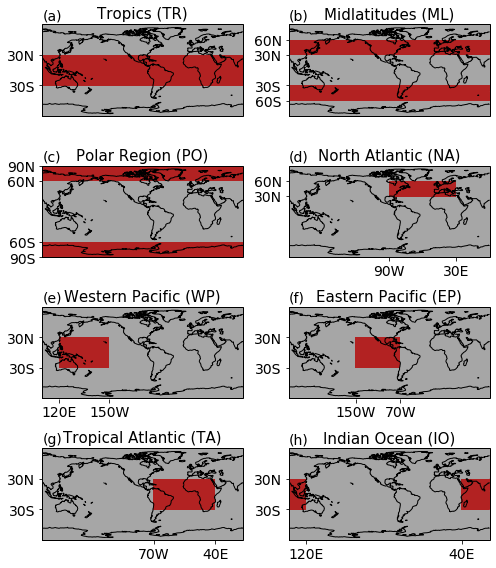

In [5]:
proj = ccrs.PlateCarree(central_longitude=-90)
fig, ax = plt.subplots(4, 2, figsize=(7, 8),#figsize(10), 
                       subplot_kw=dict(projection=proj))
ax = ax.reshape(-1)
for i in range(ax.shape[0]):
    ax[i].coastlines(rasterized=True)
    ax[i].set_aspect('auto')
    ax[i].tick_params(labelsize=14)
del i

# TR
ax[0].pcolormesh(lons, lats, mask_TR, vmin=0, vmax=1,
                 cmap=LinearSegmentedColormap.from_list(mymap, colors=colors,
                                                        N=2),
                 rasterized=True, transform=ccrs.PlateCarree())
ax[0].set_title('Tropics (TR)', fontsize=15)

# ML
ax[1].pcolormesh(lons, lats, mask_ML, vmin=0, vmax=1,
                 cmap=LinearSegmentedColormap.from_list(mymap, colors=colors,
                                                        N=2),
                 rasterized=True, transform=ccrs.PlateCarree())
ax[1].set_title('Midlatitudes (ML)', fontsize=15)

# PO
ax[2].pcolormesh(lons, lats, mask_PO, vmin=0, vmax=1,
                 cmap=LinearSegmentedColormap.from_list(mymap, colors=colors,
                                                        N=2),
                 rasterized=True, transform=ccrs.PlateCarree())
ax[2].set_title('Polar Region (PO)', fontsize=15)

# NAe
ax[3].pcolormesh(lons, lats, mask_NAe, vmin=0, vmax=1,
                 cmap=LinearSegmentedColormap.from_list(mymap, colors=colors,
                                                        N=2),
                 rasterized=True, transform=ccrs.PlateCarree())
ax[3].set_title('North Atlantic (NA)', fontsize=15)

# WP
ax[4].pcolormesh(lons, lats, mask_WP, vmin=0, vmax=1,
                 cmap=LinearSegmentedColormap.from_list(mymap, colors=colors,
                                                        N=2),
                 rasterized=True, transform=ccrs.PlateCarree())
ax[4].set_title('Western Pacific (WP)', fontsize=15)

# EP
ax[5].pcolormesh(lons, lats, mask_EP, vmin=0, vmax=1,
                 cmap=LinearSegmentedColormap.from_list(mymap, colors=colors,
                                                        N=2),
                 rasterized=True, transform=ccrs.PlateCarree())
ax[5].set_title('Eastern Pacific (EP)', fontsize=15)

# TA
ax[6].pcolormesh(lons, lats, mask_TA, vmin=0, vmax=1,
                 cmap=LinearSegmentedColormap.from_list(mymap, colors=colors,
                                                        N=2),
                 rasterized=True, transform=ccrs.PlateCarree())
ax[6].set_title('Tropical Atlantic (TA)', fontsize=15)

# IO
ax[7].pcolormesh(lons, lats, mask_IO, vmin=0, vmax=1,
                 cmap=LinearSegmentedColormap.from_list(mymap, colors=colors,
                                                        N=2),
                 rasterized=True, transform=ccrs.PlateCarree())
ax[7].set_title('Indian Ocean (IO)', fontsize=15)

# set xticks and yticks for latitudes and longitudes
# TR
ax[0].set_yticks([lat_sout_TR, lat_nort_TR], crs=ccrs.PlateCarree())
ax[0].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
# ML
ax[1].set_yticks([lat_sout_ML_SH, lat_nort_ML_SH, 
                  lat_sout_ML_NH, lat_nort_ML_NH], crs=ccrs.PlateCarree())
ax[1].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
# PO
ax[2].set_yticks([-90, lat_sout_ML_SH, 
                  lat_nort_ML_NH, 90], crs=ccrs.PlateCarree())
ax[2].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
# NAe
ax[3].set_yticks([lat_sout_NAe, lat_nort_NAe], crs=ccrs.PlateCarree())
ax[3].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[3].set_xticks([lon_west_NAe, lon_east_NAe], crs=ccrs.PlateCarree())
ax[3].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol='',
                                                   dateline_direction_label=True))
# WP
ax[4].set_yticks([lat_sout_TR, lat_nort_TR], crs=ccrs.PlateCarree())
ax[4].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[4].set_xticks([lon_west_WP, lon_east_WP], crs=ccrs.PlateCarree())
ax[4].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol='',
                                                   dateline_direction_label=True))
# EP
ax[5].set_yticks([lat_sout_TR, lat_nort_TR], crs=ccrs.PlateCarree())
ax[5].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[5].set_xticks([lon_west_EP, lon_east_EP], crs=ccrs.PlateCarree())
ax[5].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol='',
                                                   dateline_direction_label=True))
# TA
ax[6].set_yticks([lat_sout_TR, lat_nort_TR], crs=ccrs.PlateCarree())
ax[6].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[6].set_xticks([lon_west_TA, lon_east_TA], crs=ccrs.PlateCarree())
ax[6].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol='',
                                                   dateline_direction_label=True))
# IO
ax[7].set_yticks([lat_sout_TR, lat_nort_TR], crs=ccrs.PlateCarree())
ax[7].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[7].set_xticks([lon_west_IO, lon_east_IO], crs=ccrs.PlateCarree())
ax[7].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol='',
                                                   dateline_direction_label=True))

fig.canvas.draw()
fig.tight_layout()

# a), b) etc for subplots
labs = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
for i in range(ax.shape[0]):
    ax[i].text(0.0, 1.02, labs[i], va='bottom', ha='left',
               rotation_mode='anchor', fontsize=14,
               transform=ax[i].transAxes)
del i

fig.savefig('figure_S2.pdf', bbox_inches='tight')
plt.show(fig)
plt.close(fig)
del fig, ax, proj